
😂 <span style="text-decoration:underline">***Demo Flow***</span> 😂 :-
1. **Prepare the dataset**
2. **Feature Engineering**
    1. *Discretization (One Hot Encoding)*
    2. *Continuous (Standardization)*
3. **Experimental Set up**
    1. *define the list of classifiers*
    2. *define the features*
    3. *define method to calculate the accuracy*
4. **Results**

# Prepare the dataset

In [1]:
import pandas as pd
from sklearn.datasets  import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer,StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier

In [2]:
data = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=1, n_clusters_per_class=4,scale=1000,random_state=2)
X = data[0]
y = data[1]

In [3]:
df = pd.DataFrame(data[0],columns=["attr_1","attr_2","attr_3","attr_4","attr_5","attr_6","attr_7","attr_8","attr_9","attr_10"])
df["decision"] = data[1]
df.head(4)

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,decision
0,-2369.158643,56.130173,-1525.983162,428.596415,1143.664836,194.842626,326.885864,-1527.116030,2405.170839,1244.964341,1
1,1224.271681,1640.219953,-3470.511695,-333.617692,510.613636,-4734.883391,2021.570578,-401.249835,-886.756661,1202.353595,0
2,2857.427880,-247.212549,514.387127,1441.105846,165.976887,1035.281826,796.020461,13.395735,-516.461313,-4074.527670,0
3,1008.914917,-142.395222,-456.497928,970.245905,2442.755747,-3922.864704,-2064.464182,-2051.386009,-1598.792117,-1469.500701,0


# Feature Engineering

### Discretization Approach (One Hot Encoding)

In [4]:
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal',strategy="quantile")
discretized_X = discretizer.fit_transform(X)
print(discretized_X.shape)
print(discretizer.bin_edges_)
discretized_X

(1000, 10)
[array([-6984.44928283,  -262.40663797,  5400.3502634 ])
 array([-3471.54989122,   -88.04681087,  3120.09471853])
 array([-4474.46871863,   266.07407529,  5506.26155852])
 array([-6436.20543799,   313.63947195,  6068.86705086])
 array([-7479.37469787,   242.76266907,  7398.49340603])
 array([-9224.40497664,  -381.18301789,  9022.42508527])
 array([-4756.97177357,     5.86718871,  5379.6893395 ])
 array([-7138.4340479 ,  -377.04098532,  6820.3259895 ])
 array([-5685.70243069,  -551.24260947,  5999.30981001])
 array([-5779.62269061,    43.62116788,  8122.66918198])]


array([[0., 1., 0., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

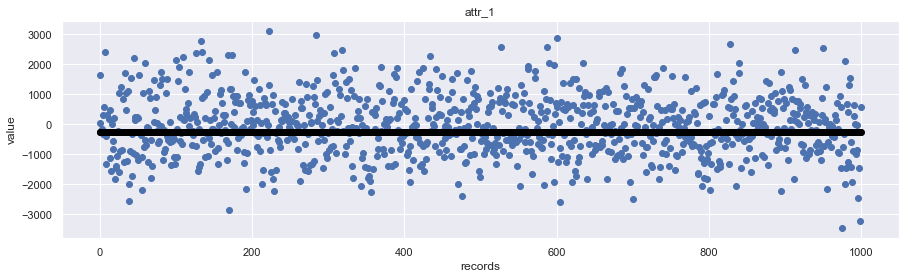

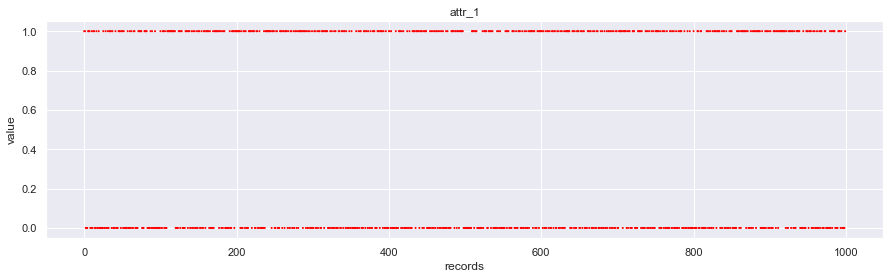

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.close()

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False,figsize=(15,4))
axs.scatter(list(range(X.shape[0])),X[:,1])
axs.plot([discretizer.bin_edges_[0][1] for i in range(X.shape[0])], marker = 'o',color="black")
axs.title.set_text('attr_1')
axs.set_ylabel('value')
axs.set_xlabel('records')
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False,figsize=(15,4))
axs.scatter(list(range(discretized_X.shape[0])),discretized_X[:,1],s=[1 for i in range(discretized_X.shape[0])],color="red")
axs.title.set_text('attr_1')
axs.set_ylabel('value')
axs.set_xlabel('records')

plt.show()

### Continuous Approach (Standardization)

In [6]:
standarizer = StandardScaler()
continuous_X = standarizer.fit_transform(X)
print(continuous_X.shape)
continuous_X

(1000, 10)


array([[-1.15848837,  0.09331283, -1.04322755, ..., -0.66440342,
         1.54558652,  0.64225937],
       [ 0.78979406,  1.67704015, -2.14651255, ..., -0.06594224,
        -0.18265656,  0.62076197],
       [ 1.67525704, -0.20996048,  0.11443607, ...,  0.1544652 ,
         0.01174638, -2.04145878],
       ...,
       [ 0.36064085, -1.43154917, -0.00555773, ..., -0.00618011,
        -0.52876266, -1.03046167],
       [-1.51181574, -3.17419012, -0.85518387, ...,  0.06377689,
         0.82952075, -0.00410985],
       [-0.20726518,  0.60866099,  1.07558831, ..., -0.70989655,
        -0.01309639,  1.02099191]])

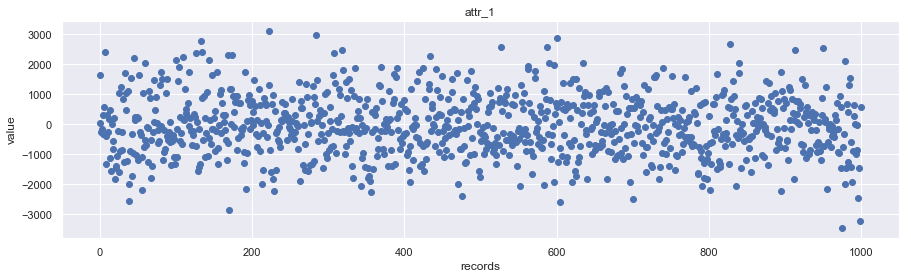

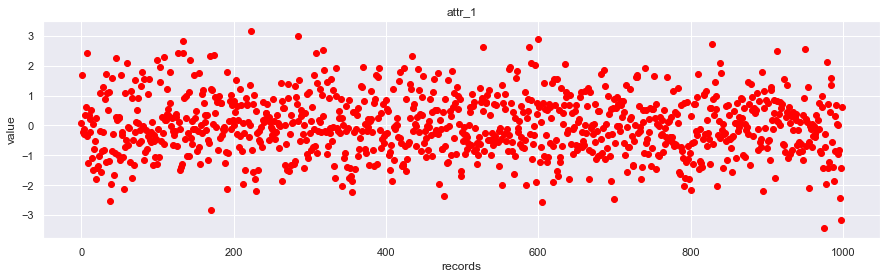

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.close()

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False,figsize=(15,4))
axs.scatter(list(range(X.shape[0])),X[:,1])
axs.title.set_text('attr_1')
axs.set_ylabel('value')
axs.set_xlabel('records')
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False,figsize=(15,4))
axs.scatter(list(range(continuous_X.shape[0])),continuous_X[:,1],color="red")
axs.title.set_text('attr_1')
axs.set_ylabel('value')
axs.set_xlabel('records')

plt.show()

# Experimental Set up

### define the list of classifiers

In [8]:
classifer_dict = {"support_vector":SVC(kernel='linear', C=1,random_state=1),
                  "random_forest":RandomForestClassifier(n_estimators=400,random_state=1),
                  "logistic_regression":LogisticRegression(solver="lbfgs",random_state=1),
                  "gradient_boost":GradientBoostingClassifier(n_estimators=400,random_state=1),
                  "sgd_classifier":SGDClassifier(max_iter=1000,class_weight="balanced",random_state=1),
                  "ridge_classifier":RidgeClassifier(class_weight="balanced",random_state=1)}

### define the features

In [9]:
dataset_dict = {"discrete_onehot":discretized_X,"continuous":continuous_X}

### define method to calculate the accuracy

In [10]:
def calculate_cross_val_score(clf,dataset,y):
    scores = cross_val_score(clf, dataset, y, cv=5)
    acc = "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    acc = scores.mean()*100
    return acc

# Results

### show metric

In [11]:
result_df = pd.DataFrame()
classifier_list = classifer_dict.keys()
result_df["classifiers"] = classifier_list
for dataset in dataset_dict:
    res = list()
    for classifier in classifier_list:
        acc = calculate_cross_val_score(classifer_dict[classifier],dataset_dict[dataset],y)
        res.append(acc)
    result_df[dataset] = res
result_df

,classifiers,discrete_onehot,continuous
0,support_vector,76.497267,82.995835
1,random_forest,80.700800,88.396367
2,logistic_regression,76.497262,82.997342
3,gradient_boost,81.402805,85.497357
4,sgd_classifier,77.593765,82.396835
5,ridge_classifier,76.394257,82.896342


### graph visualization

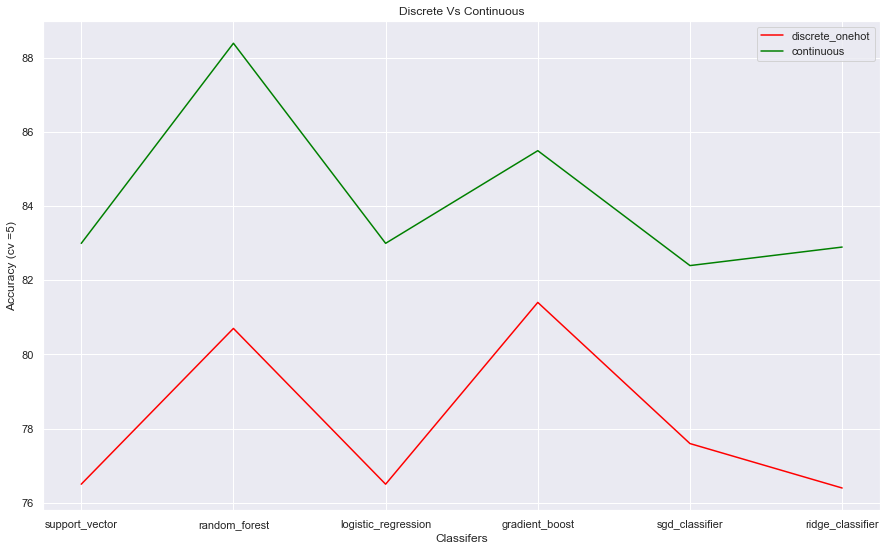

In [12]:
plt.close()
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False,figsize=(15,9))
axs.plot(result_df["classifiers"],result_df["discrete_onehot"],color="red",label="discrete_onehot")
axs.plot(result_df["classifiers"],result_df["continuous"],color="green",label="continuous")
axs.title.set_text('Discrete Vs Continuous')
axs.set_xlabel('Classifers')
axs.set_ylabel('Accuracy (cv =5)')
axs.legend()
plt.show()